In [1]:
from polypy import Read as rd
from polypy import MSD as MSD
from polypy import Utils as Ut
from polypy import Write as wr

import numpy as np

In [2]:
timestep = 0.25

In [3]:
# 1) Read Coordinates

data = rd.read_history("../../../OLD/data/HISTORY_F", ["F"])
MSD.plane_msd(data, timestep, runs=2, ul=8.0, ll=0.1, direction="x")

In [4]:
# 6) MSD Calculation with One Trajectory Sweep

msd_data = MSD.msd(data, timestep)

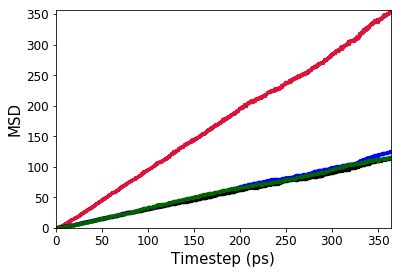

In [5]:
wr.msd_plot(msd_data)

In [6]:
Diff = Ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = Ut.three_d_diffusion_coefficient(Diff)

XDiff = Ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = Ut.three_d_diffusion_coefficient(XDiff)

YDiff = Ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = Ut.three_d_diffusion_coefficient(YDiff)

ZDiff = Ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = Ut.three_d_diffusion_coefficient(ZDiff)

In [7]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)


Three Dimensional Diffusion Coefficient 1.6072914251048065
One Dimensional Diffusion Coefficient in X 0.5624152384459937
One Dimensional Diffusion Coefficient in Y 0.5128264260667497
One Dimensional Diffusion Coefficient in Z 0.532049760592063


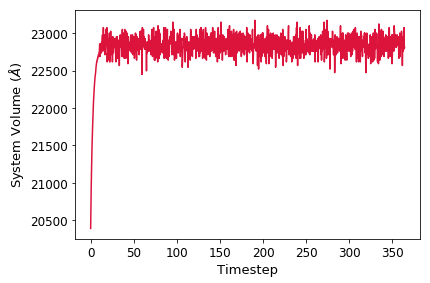

In [8]:
volume, time = Ut.system_volume(data, timestep)
Average_Volume = np.mean(volume)

In [9]:
Number_of_Charge_Carriers = data['natoms']

In [10]:
Ionic_Conductivity = Ut.conductivity(Number_of_Charge_Carriers, Average_Volume, Diffusion_Coefficient, 1500)

In [11]:
print("Ionic Conductivity :", Ionic_Conductivity)

Ionic Conductivity : 86.6729520622043
